# Reyfman data

In [38]:
import scanpy as sc
import glob
import anndata
import scIB
import pandas as pd
import numpy as np

In [2]:
files = glob.glob('../../../data/HLCA_extended/extension_datasets/raw/Reyfman/*filtered*')

In [3]:
files

['/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489198_SSc-ILD_02_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489183_IPF_01_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489196_Myositis-ILD_01_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489190_IPF_04_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489184_IPF_02_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489186_Cryobiopsy_01_filtered_gene_bc_matrices_h5.h5',
 '/storage/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets/raw/Reyfman/GSM3489194_SSc-ILD_01_fi

In [4]:
adatas = {}
for i in files:
    name = "_".join(i.split('/')[9].split('_')[1:3])
    sub_id = i.split('/')[9].split('_')[0]
    adatas[name] = sc.read_10x_h5(i)
    adatas[name].obs['condition']=name.split('_')[0]
    #adatas[name].obs['condition']=name.split('_')[0]
    adatas[name].obs['subject_ID']=name
    adatas[name].var_names_make_unique()
    #adatas[name].obs_names = adatas[name].obs_names+name

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [5]:
adata = anndata.concat(adatas)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [6]:
adata

AnnData object with n_obs × n_vars = 37287 × 33694
    obs: 'condition', 'subject_ID'

In [7]:
adata.obs_names_make_unique()

In [8]:
adata.obs['dataset']='MisharinBudinger2019_disease'
adata.obs['study']='MisharinBudinger2019'

In [9]:
adata.obs

,condition,subject_ID,dataset,study
AAACCTGCAACTGGCC-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019
AAACCTGCACAGACAG-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019
AAACCTGCACGTGAGA-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019
AAACCTGGTAGAAGGA-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019
AAACCTGGTATATGAG-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019
...,...,...,...,...
TTTGTCAAGGGTCTCC-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019
TTTGTCACAATAACGA-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019
TTTGTCAGTTGGTTTG-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019
TTTGTCAGTTTAGCTG-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019


In [10]:
scIB.pp.summarize_counts(adata)

... storing 'condition' as categorical
... storing 'subject_ID' as categorical
... storing 'dataset' as categorical
... storing 'study' as categorical


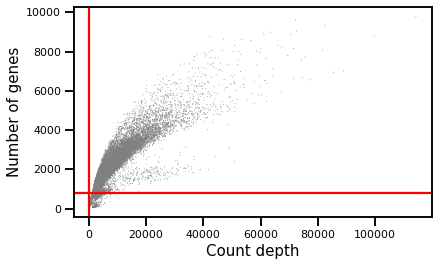

Counts Threshold: (10, 40000)


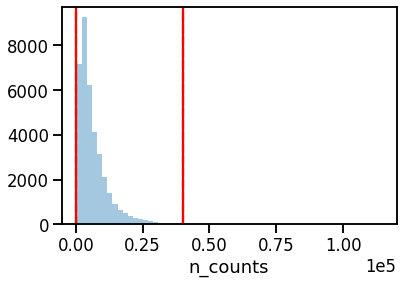

lower threshold: 10


/home/icb/malte.luecken/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/icb/malte.luecken/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


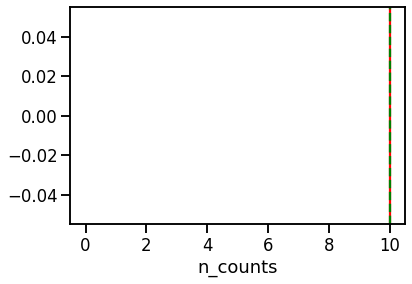

upper threshold: 40000


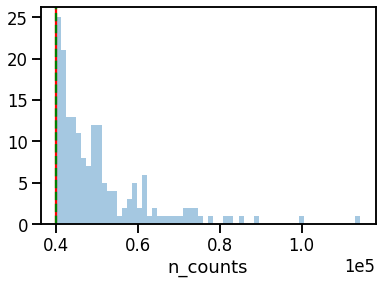

Gene Threshold: (800, 5000)


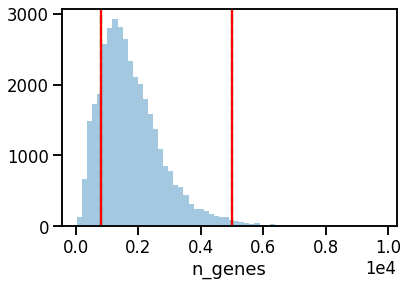

lower threshold: 800


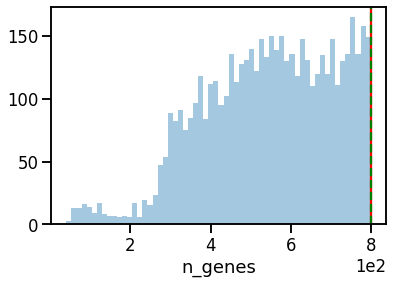

upper threshold: 5000


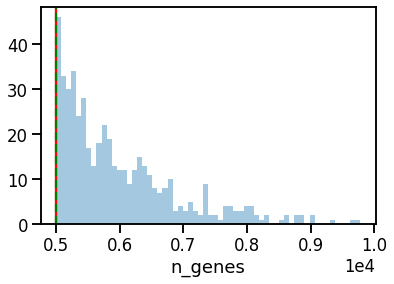

In [11]:
scIB.pp.plot_QC(adata, gene_threshold=(800,5000), count_threshold=(10,40000))

In [12]:
sc.pp.filter_cells(adata, max_genes=7000)

/home/icb/malte.luecken/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [13]:
sc.pp.filter_genes(adata, min_counts=1)

In [15]:
adata.obs=adata.obs.iloc[:,0:4]

In [16]:
adata.obs['preprocessing']='filter cells to max_genes=7000 and genes to min_counts=1'

In [17]:
adata.obs.condition.unique()

['SSc-ILD', 'IPF', 'Myositis-ILD', 'Cryobiopsy', 'HP']
Categories (5, object): ['SSc-ILD', 'IPF', 'Myositis-ILD', 'Cryobiopsy', 'HP']

# Assign further obs covariates

In [25]:
adata

AnnData object with n_obs × n_vars = 37221 × 27181
    obs: 'condition', 'subject_ID', 'dataset', 'study', 'preprocessing'
    var: 'n_counts'

In [26]:
adata.obs['sample'] = adata.obs['subject_ID']

# Load annotations

In [20]:
idents = pd.read_csv('../../../data/HLCA_extended/extension_datasets/raw/Reyfman/Reyfman_2019_idents.csv')
samps = pd.read_csv('../../../data/HLCA_extended/extension_datasets/raw/Reyfman/Reyfman_samples.csv')

In [21]:
idents.index = idents['Unnamed: 0']
samps.index = samps['paper_ID']

In [27]:
samps
idents
adata.obs

,library_ID,paper_ID,dbGap_ID/GEO
paper_ID,,,
Donor_01,SC07,Donor_01,Subject_01
IPF_01,SC08,IPF_01,Subject_02
IPF_02,SC09,IPF_02,Subject_03
Donor_02,SC10,Donor_02,Subject_04
Cryobiopsy_01,SC13,Cryobiopsy_01,Subject_05
Donor_03,SC18,Donor_03,Subject_06
IPF_03,SC19,IPF_03,Subject_07
Donor_04,SC20,Donor_04,Subject_08
IPF_04,SC21,IPF_04,Subject_09


,Unnamed: 0,integrated.data@active.ident
Unnamed: 0,,
SC07_AAACCTGAGCGTTTAC,SC07_AAACCTGAGCGTTTAC,AT2
SC07_AAACCTGAGTCGCCGT,SC07_AAACCTGAGTCGCCGT,AT2
SC07_AAACCTGGTAGGACAC,SC07_AAACCTGGTAGGACAC,AT2
SC07_AAACCTGGTGCCTTGG,SC07_AAACCTGGTGCCTTGG,AT2
SC07_AAACCTGGTTCAGCGC,SC07_AAACCTGGTTCAGCGC,Secretory
...,...,...
SC30_TTTGTCATCATACGGT,SC30_TTTGTCATCATACGGT,Alveolar macrophages
SC30_TTTGTCATCATGTCTT,SC30_TTTGTCATCATGTCTT,AT2
SC30_TTTGTCATCGAACTGT,SC30_TTTGTCATCGAACTGT,SPP1 Macrophages


,condition,subject_ID,dataset,study,preprocessing,sample
AAACCTGCAACTGGCC-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
AAACCTGCACAGACAG-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
AAACCTGCACGTGAGA-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
AAACCTGGTAGAAGGA-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
AAACCTGGTATATGAG-1,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
...,...,...,...,...,...,...
TTTGTCAAGGGTCTCC-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
TTTGTCACAATAACGA-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
TTTGTCAGTTGGTTTG-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
TTTGTCAGTTTAGCTG-1,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03


In [28]:
#Map obs names
adata.obs_names = [samps.loc[adata.obs['sample'][idx]]['library_ID']+'_'+idx.split('-')[0] for idx in adata.obs_names]

In [29]:
adata.obs

,condition,subject_ID,dataset,study,preprocessing,sample
SC30_AAACCTGCAACTGGCC,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
SC30_AAACCTGCACAGACAG,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
SC30_AAACCTGCACGTGAGA,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
SC30_AAACCTGGTAGAAGGA,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
SC30_AAACCTGGTATATGAG,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02
...,...,...,...,...,...,...
SC19_TTTGTCAAGGGTCTCC,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
SC19_TTTGTCACAATAACGA,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
SC19_TTTGTCAGTTGGTTTG,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03
SC19_TTTGTCAGTTTAGCTG,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03


In [31]:
adata.obs['original_celltype_ann'] = idents['integrated.data@active.ident']

In [32]:
adata.obs

,condition,subject_ID,dataset,study,preprocessing,sample,original_celltype_ann
SC30_AAACCTGCAACTGGCC,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02,Alveolar macrophages
SC30_AAACCTGCACAGACAG,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02,Alveolar macrophages
SC30_AAACCTGCACGTGAGA,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02,Alveolar macrophages
SC30_AAACCTGGTAGAAGGA,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02,AT2
SC30_AAACCTGGTATATGAG,SSc-ILD,SSc-ILD_02,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,SSc-ILD_02,Alveolar macrophages
...,...,...,...,...,...,...,...
SC19_TTTGTCAAGGGTCTCC,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03,AT2
SC19_TTTGTCACAATAACGA,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03,SPP1 Macrophages
SC19_TTTGTCAGTTGGTTTG,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03,DC
SC19_TTTGTCAGTTTAGCTG,IPF,IPF_03,MisharinBudinger2019_disease,MisharinBudinger2019,filter cells to max_genes=7000 and genes to mi...,IPF_03,SPP1 Macrophages


In [35]:
adata.obs['original_celltype_ann'].value_counts()

Alveolar macrophages        13891
AT2                          6549
SPP1 Macrophages             2396
CD8 T cells                  1774
F13A1 Macrophages            1493
Ciliated                     1488
Monocytes                    1346
Secretory                    1203
Plasma cells                 1167
Proliferating immune          963
DC                            946
AT1                           896
Endothelial                   798
B cells                       549
KRT5 Basal cells              541
Mast cells                    479
SMC+Fibroblasts               423
Lymphatics                     94
Proliferating epithelial       75
Erythroblasts                  26
Name: original_celltype_ann, dtype: int64

In [40]:
np.sum(adata.obs['original_celltype_ann'].isna())

124

### Filter out NA celltype cells

In [42]:
adata = adata[~adata.obs['original_celltype_ann'].isin([np.nan])].copy()

In [43]:
adata
np.sum(adata_nona.obs['original_celltype_ann'].isna())

AnnData object with n_obs × n_vars = 37097 × 27181
    obs: 'condition', 'subject_ID', 'dataset', 'study', 'preprocessing', 'sample', 'original_celltype_ann'
    var: 'n_counts'

0

# Write full object

In [44]:
adata

AnnData object with n_obs × n_vars = 37097 × 27181
    obs: 'condition', 'subject_ID', 'dataset', 'study', 'preprocessing', 'sample', 'original_celltype_ann'
    var: 'n_counts'

In [45]:
adata.write('../../../data/HLCA_extended/extension_datasets/ready/full/reyfman_disease.h5ad')

... storing 'preprocessing' as categorical
... storing 'original_celltype_ann' as categorical


# Subset data

In [46]:
adata = sc.read('ready/full/reyfman_disease.h5ad')
gene_set = pd.read_csv('genes_for_mapping.csv')

In [47]:
cd ../scripts

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/scripts


In [48]:
import preprocessing as pp

In [49]:
cd ../query_datasets/

/mnt/znas/icb_zstore01/groups/ml01/workspace/hlca_lisa.sikkema_malte.luecken/query_datasets


In [50]:
adata_sub = pp.subset_and_pad_adata(gene_set, adata)

not all genes were recovered, filling in 0 counts for 6 missing genes...


# Write output

In [51]:
adata_sub.write('../../../data/HLCA_extended/extension_datasets/ready/subsetted/reyfman_disease_sub.h5ad')

... storing 'gene_symbols' as categorical
